In [8]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

In [4]:
# Load data
df = pd.read_csv("combined_data_with_murcko_scaffolds.csv")
df["Murcko Scaffold"]

0        c1ccc(-c2nc3cc(-c4ccc5[nH]c(-c6ccc(OCC7CCCN7)c...
1                           c1ccc2c(c1)[nH]c1cc3ccncc3cc12
2               c1cc2cc3[nH]c4ccc(OCCCN5CCNCC5)cc4c3cc2cn1
3        O=C(Nc1ccc2[nH]c(-c3ccccc3)nc2c1)c1ccc2[nH]c(-...
4           c1ccc2[nH]c(-c3ccc(-c4nc5ccccc5[nH]4)cc3)nc2c1
                               ...                        
21648                      O=c1c2ccccc2oc2cc(N3CCCC3)ccc12
21649     O=C(Nc1cccc(-c2cc3ncc(-c4ccccc4)cn3n2)c1)N1CCCC1
21650      O=C(Nc1cccc(-c2ccn3c(N4CCOCC4)cnc3n2)c1)N1CCCC1
21651     O=C(Nc1cccc(-c2ccn3c(-c4ccccc4)cnc3n2)c1)N1CCCC1
21652                O=C(Nc1cccc(-c2ccn3ccnc3n2)c1)N1CCCC1
Name: Murcko Scaffold, Length: 21653, dtype: object

## Calculate unique scaffolds and visualize their distribution

There are 10510 unique scaffolds without taking into account chirality. There are 10898 unique scaffolds WITH chirality.

In [25]:
unique_scaffolds = df["Murcko Scaffold"].unique()
print(len(unique_scaffolds))

10510


In [23]:
unique_scaffolds = df_chi["Murcko Scaffold"].unique()
print(len(unique_scaffolds))

10898


In [9]:
# Plot the distribution of scaffolds
scaffold_counts = df['Murcko Scaffold'].value_counts()

In [31]:
scaffold_counts.iloc[0:100]

,count
Murcko Scaffold,
c1ccccc1,179
c1cc2ccc(-c3ccc(OCCN4CCCCC4)cc3)cc2cn1,118
c1ccc(-c2ccc3ccncc3c2)cc1,93
O=c1c2c([nH]c3ccccc13)CCCC2,79
O=c1[nH]ccc2c1[nH]c1cc(OCCN3CCCCC3)ccc12,66
...,...
O=S(=O)(c1ccccc1)N1CCCC1c1ccccc1,16
c1ccc(CSc2ncc3scnc3n2)cc1,16
c1cnc2ccc(-n3ccc(OCC4CNC4)n3)cc2c1,16


<Axes: xlabel='Murcko Scaffold'>

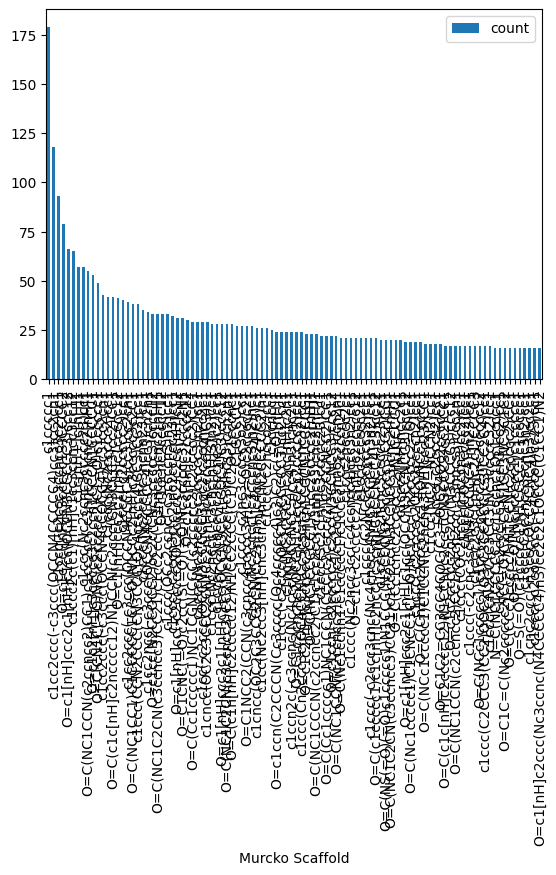

In [32]:
scaffold_counts.iloc[0:100].plot.bar()

TypeError: 'value' must be an instance of str or bytes, not a float

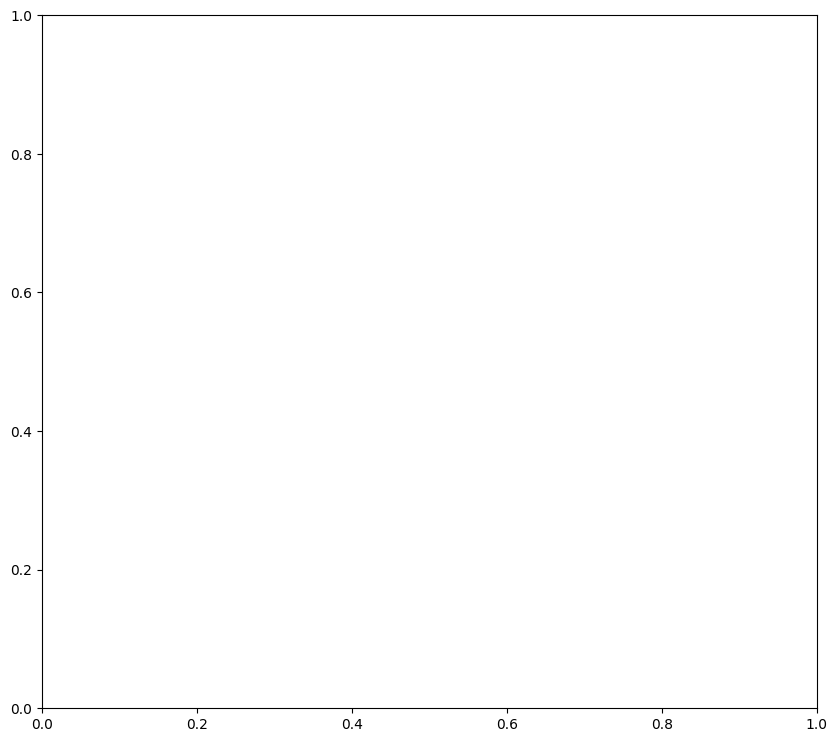

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
ax.bar(unique_scaffolds,scaffold_counts.values)

plt.show()

In [16]:
sum(scaffold_counts.iloc[i] == 1 for i in range(scaffold_counts.shape[0]))

np.int64(7354)

There are a total of 10510 unique scaffolds in this dataset containing 21653 total molecules. 7354 of those scaffolds only appear once.

In [18]:
scaffold_counts = pd.DataFrame(scaffold_counts)

In [20]:
scaffold_counts.to_csv("unique_scaffolds.csv")